# Анализ Тональности Твитов

In [130]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

import string
punkt = set(string.punctuation)
from nltk.corpus import stopwords
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/anna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/anna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [131]:
def preprocessing(text):
    token = []
    
    # токенизируем
    for sent in text:
        tokenized = word_tokenize(sent)
        token.append(tokenized)
    removed_stwd = []
    st = stopwords.words('english')
    
    # убираем стоп-слова
    for l in token:
        l = [i for i in l if i not in st]
        removed_stwd.append(l)
    result = []
    
    # убираем пунктуацию
    for l in removed_stwd:
        l = [i for i in l if i not in punkt]
        result.append(l)
        
    res2 = [x for x in result if x != []]
    
    return res2

### 1.1 Загрузка Твитов

In [132]:
import json
with open('./tweets.json.txt', 'r+') as f:
    tweet = f.readlines()

In [133]:
for tw in tweet:
    tw = tw.replace("'", '"')

In [134]:
j = []
for i in tweet:
    j.append(json.loads(i))

In [135]:
new = []
for dic in j:
    dic2 = {}
    for key in dic:
        if key == 'text':
            dic2.update({'text': dic['text']})
        if key == 'user':
            dic2.update({'name': dic['user']['name']})
            dic2.update({'location': dic['user']['location']})
    if dic2 != {}:
        new.append(dic2)

### 1.2 Загрузка AFINN датасета

AFINN - это список английских слов, валентность которых определяется целым числом от **-5 (отрицательное значение)** до **+5 (положительное значение)**.

In [136]:
with open('./AFINN.txt', 'r+') as f:
    afinn = f.readlines()

In [137]:
adict = {}
for word in afinn:
    a = word.split()
    adict.update({a[0]: a[-1]})

### 1.3 Препроцессинг + Определение валентности твитов

In [138]:
text = []

for dictionary in new:
    if dictionary != {}:
        text.append(dictionary['text'])

In [139]:
res = preprocessing(text)

In [140]:
sums = []
for unit in res:
    count = 0
    for word in unit:
        if word in adict:
            count += int(adict[word])
    sums.append(count)
    adict.update({a[0]: a[-1]})

In [141]:
import numpy as np
sorted_sums_indexes = np.argsort(sums)

In [142]:
sorted_sums_indexes

array([7301,  440, 2759, ..., 1421, 5006,  390])

### Топ 10 Самых Счастливых Твитов

In [143]:
i = 0
for index in reversed(sorted_sums_indexes[-10:]):
    i += 1
    print('{}. {}'.format(i, text[index]))

1. dear @Harry_Styles you're so amazing, so kind, so beautiful, I’m so lucky to have you in my life.
Mind following me?⋆*
All the love x
30,052
2. RT @baylee_beulke: The 5 best compliments
-you're easy to talk to
-but you're different
-you smell good
-you have nice eyebrows 
-I love yo…
3. RT @MorganSmith15: Barkley had a really good day.. Nelson rookie from USC was outstanding. All in one preseason game. It was a fun one even…
4. @HunterHaleyKing I am so glad we finally got to meet! I have been a fan for a long time! Stay sweet &amp; beautiful! 😉 http://t.co/zjcJQAy5lE
5. RT @HCeretto: I don't love you I'm just passing the time
You could love me if I knew how to lie
But who could love me? I am out of my mind
6. I want to win this awesome AK-47 | Redline on CSGOW.IN  http://t.co/VEIRx9nqsW #csgowin
7. Wishing my best friend the best of luck at worlds, I know you'll… https://t.co/vawtSuwJUo
8. @zaynmalik 
Hey baby how are u ?😘
Hope you're well 😄♥
I love u so so much ❤
Can u follow me pl

### Топ 10 Самых Счастливых Пользователей

In [144]:
i = 0
for index in reversed(sorted_sums_indexes[-10:]):
    i += 1
    print('{}. {}'.format(i, new[index]['name']))

1. harry follow Gre?
2. Sara Lambert
3. Matt Pressman
4. Laura 
5. Elena
6. Muraru Cristian
7. Laur
8. Caroline loves 1D
9. Ryan Jilka
10. Yazz  Reed 


### Топ 10 Самых Счастливых Геолокаций

Некоторые решили не делиться своей геолокацией

In [145]:
i = 0
for index in reversed(sorted_sums_indexes[-10:]):
    i += 1
    print('{}. {}'.format(i, new[index]['location']))

1. H&L; /zquad
2. USA
3. Gainesville
4. Greenbrier, Arkansas
5. Málaga
6. 
7. 
8. Poland
9. Wichita, Kansas
10. 


# Анализ Твитов Илона Маска (2012 - 2017)

In [146]:
import pandas as pd

In [147]:
elon_data = pd.read_csv('./data_elonmusk.csv', index_col=None, encoding="ISO-8859-1")

In [148]:
elon_data

,row ID,Tweet,Time,Retweet from,User
0,Row0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,Row1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Row4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk
...,...,...,...,...,...
3213,Row3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:03,NaN,elonmusk
3214,Row3214,These articles in Space News describe why Aria...,2012-11-20 08:38:31,NaN,elonmusk
3215,Row3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:44,NaN,elonmusk
3216,Row3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:46,NaN,elonmusk


In [149]:
dict_of_dicts = elon_data.T.to_dict()

In [150]:
# Время в формат ГОД-МЕСЯЦ
for i in range(len(dict_of_dicts)):
    dict_of_dicts[i]['Time'] = dict_of_dicts[i]['Time'][0:7]

### 2.1 Препроцессинг + Определение валентности твитов

In [151]:
text = []
               
for i in range(len(dict_of_dicts)):
    text.append(dict_of_dicts[i]['Tweet'])
        
res = preprocessing(text)

sums = []
for twt in res:
    count = 0
    for word in twt:
        if word in adict:
            count += int(adict[word])
    sums.append(count)
    adict.update({a[0]: a[-1]})
    
    
sorted_sums_indexes = np.argsort(sums)

In [152]:
sorted_sums_indexes

array([ 206,  446,  199, ...,  122, 1709,  753])

### Самые Счастливые Твиты Илона Маска

In [153]:
i = 0
for index in reversed(sorted_sums_indexes[-10:]):
    i += 1
    print('{}. {}'.format(i, text[index]))

1. RT @PokerVixen: @elonmusk I'm so unbelievably happy with my Model S. When people ask if l like it I respond No, I love it! ? it's amazing!?
2. @tzepr Certainly agree that it is first and foremost a triumph for humanity. The cheering is in good spirit.
3. RT @cmleahey: Mars is looking pretty good right now, no? Meet the woman (@elonmusk's right hand @SpaceX ) working to get us there https://t?
4. Many in America don't realize how proud they should be of the legal system. Not perfect, but nowhere is the cause of justice better served.
5. @inhaleray I agree with creating great jobs, restoring US strength as a great manufacturer of products and anything? https://t.co/2LwDBDLeO0
6. @JRMYGRNBRGR Hopefully, early next week. Results from limited release look good so far. Trying our best to be super careful.
7. First profitable Q for Tesla thanks to awesome customers & hard work by a super dedicated team http://t.co/njumz2SDmx
8. @DJSnM It was a tough negotiation, but they seemed like good g

### Самые Несчастные Твиты Илона Маска

In [154]:
i = 0
for index in sorted_sums_indexes[0:10]:
    i += 1
    print('{}. {}'.format(i, text[index]))

1. @DMC_Ryan Probably middle of next year. Focus now is on getting out of Model 3 production hell. More versions = deeper in hell.
2. @MarkeR2002 @chrispaine So crazy that people were arrested for trying to keep their cars from being destroyed
3. @iFahadUddin @EricDiepeveen If you buy a ticket to hell, it isn't fair to blame hell ...
4. Why does a Tesla fire w no injury get more media headlines than 100,000 gas car fires that kill 100s of people per year?
5. Tesla is also extending the Model S warranty to cover any fire damage even if due solely to a driver accident
6. @alansmurray No, you were misleading mostly on your own, but w many copycats. Jalopnik just lost it's sense of irony & didn't get my tweet.
7. There's crazy, there's batsh*t crazy, then there's North Korea crazy... http://t.co/etJmNZqVD1
8. And, yes, I do in fact know that this sounds crazy. That is not lost on me. Nor I do think SpaceX will do this alone.
9. @jDaz Because I was a dumb idiot and didn't realize at the tim

# Заработать на Анализе Твитов?

### Тут я решила посмотреть, коррелирует ли счастье твитов Илона Маска со стоимостью акций Тесла

In [155]:
import matplotlib.pyplot as plt

In [156]:
# группировка по месяцам
unique = {}
for i in range(len(sums)):
    if str(dict_of_dicts[i]['Time']) in unique.keys():
        unique[str(dict_of_dicts[i]['Time'])] += sums[i]
    else:
        unique[str(dict_of_dicts[i]['Time'])] = sums[i]

# График счастья твитов по месяцам

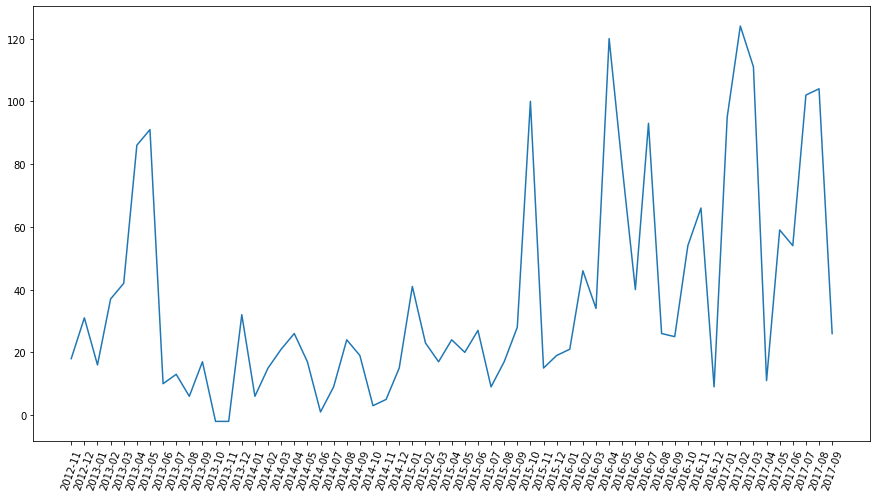

In [157]:
lists = sorted(unique.items())  # сортировка по ключу, возвращает список кортежей

x, y = zip(*lists)  # распаковка списка пар в два кортежа
plt.figure(figsize=(15, 8))
plt.xticks(rotation=70)
plt.plot(x, y)
plt.show()

# График стоимости акций Тесла за тот же период времени

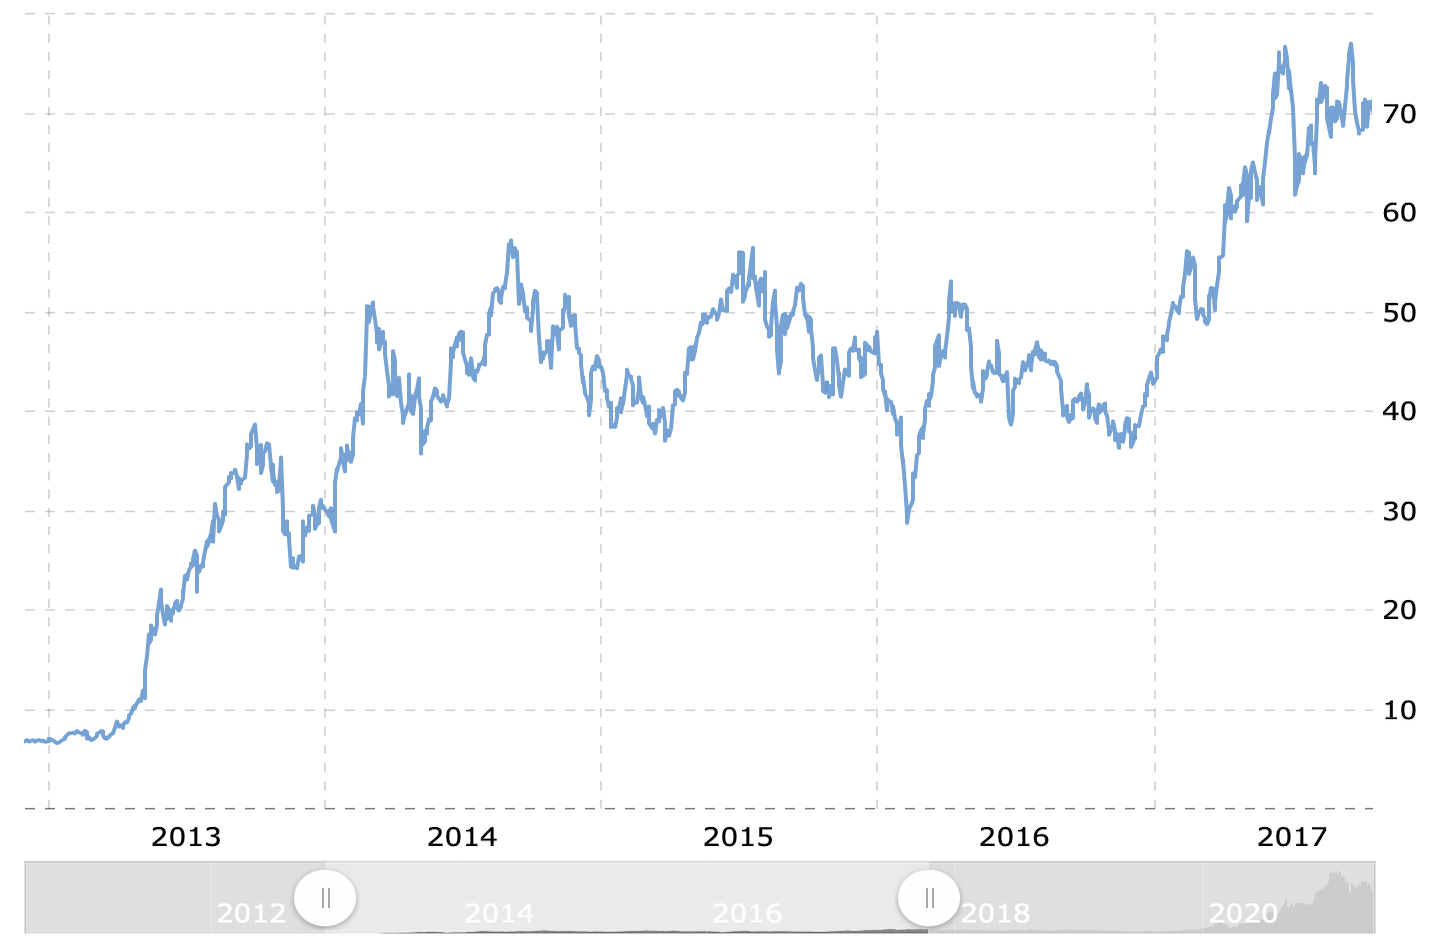

# Вывод:
**Видно, что твиттер Илона в среднем счастливее, когда акции Теста растут. Тем не менее корреляция недостаточно сильна, чтобы делать на её основе какие-либо выводы. Не рекомендуется использовать в целях обогащения)** 